# Task: Stock Market Prediction (LGMVIP)

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('stock.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df.shape

(2035, 8)

In [5]:
df1=df.reset_index()['Close']

In [6]:
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [7]:
df1.shape

(2035,)

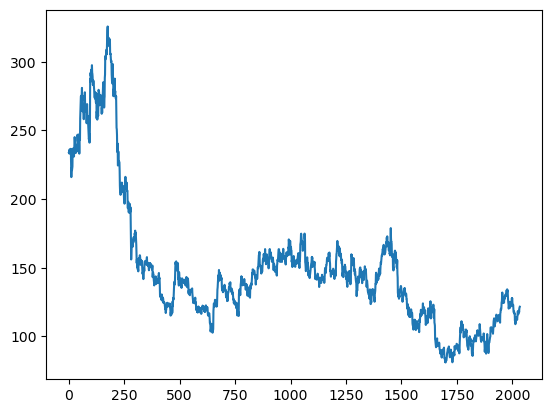

In [8]:
from matplotlib import pyplot as plt
plt.plot(df1)

In [9]:
#we have to apply MinMax Scaler since LSTM is sensitive to the scale of data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [11]:
#In case of timeseries data the next data is always dependent on previous data so we cannot split randomly.
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train,test=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [12]:
len(train)

1322

In [13]:
len(test)

713

In [14]:
#Timesteps: How many previous steps are considered for predicting next value
def create(data,time=1):
    dataX,dataY=[],[]
    for i in range(len(data)-time-1):
        a=data[i:(i+time),0]
        dataX.append(a)
        dataY.append(data[i + time,0])
    return np.array(dataX),np.array(dataY)

In [15]:
time=100
X_train,y_train=create(train,time)
X_test,y_test=create(test,time)

In [16]:
X_train.shape

(1221, 100)

In [17]:
y_train.shape

(1221,)

In [18]:
#reshape the input to be [samples,timesteps,features] which is required for LSTM.
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [19]:
#Creating the LSTM model these are required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 97ms/step - loss: 0.0282 - val_loss: 0.0042
Epoch 2/100
20/20 [==============================] - 2s 77ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 3/100
20/20 [==============================] - 2s 78ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 2s 80ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 2s 80ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 2s 81ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 2s 81ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 2s 81ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 9/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0014 - val_loss: 9.3843e-04
Epoch 10/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0014 - val_loss: 0.

20/20 [==============================] - 2s 115ms/step - loss: 4.0459e-04 - val_loss: 4.0687e-04
Epoch 78/100
20/20 [==============================] - 2s 112ms/step - loss: 3.5306e-04 - val_loss: 3.2381e-04
Epoch 79/100
20/20 [==============================] - 2s 109ms/step - loss: 3.6705e-04 - val_loss: 3.9078e-04
Epoch 80/100
20/20 [==============================] - 2s 113ms/step - loss: 3.4255e-04 - val_loss: 3.4027e-04
Epoch 81/100
20/20 [==============================] - 2s 107ms/step - loss: 3.5255e-04 - val_loss: 4.5751e-04
Epoch 82/100
20/20 [==============================] - 2s 113ms/step - loss: 3.7933e-04 - val_loss: 2.8454e-04
Epoch 83/100
20/20 [==============================] - 2s 115ms/step - loss: 3.1261e-04 - val_loss: 3.1129e-04
Epoch 84/100
20/20 [==============================] - 2s 113ms/step - loss: 3.5024e-04 - val_loss: 3.9212e-04
Epoch 85/100
20/20 [==============================] - 2s 111ms/step - loss: 3.2180e-04 - val_loss: 3.7933e-04
Epoch 86/100
20/20 [===

In [23]:
#prediction for X_train and X_test
train_p=model.predict(X_train)
test_p=model.predict(X_test)

20/20 [==============================] - 0s 12ms/step


In [24]:
#since we scaled we have to reverse scale 
train_p=scaler.inverse_transform(train_p)
test_p=scaler.inverse_transform(test_p)

In [25]:
#calculating mean squared error for test
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_p))

117.80064959772986

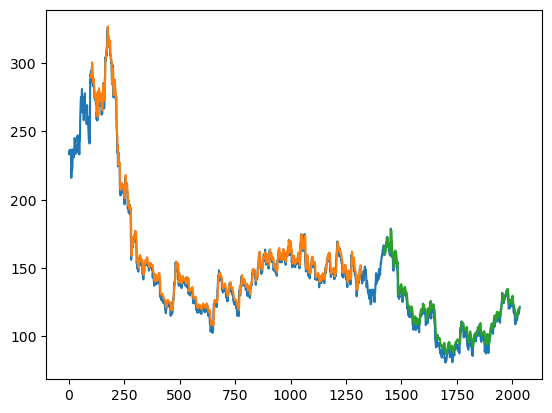

In [26]:
 # shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_p)+look_back, :] = train_p
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_p)+(look_back*2)+1:len(df1)-1, :] = test_p
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In this graph the blue line is actual data,the orange is training data prediction and green is testing data prediction.